In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir('../../')

In [3]:
from src.numpy_encode import *
from src.utils.file_processing import process_all, process_file
from src.config import *
from src.music_transformer import *
from src.multitask_transformer import *
from src.utils.stacked_dataloader import StackedDataBunch

In [4]:
from fastai.text import *

## Example notebook explaining how to encode midi to numpy array and train with fastai

Numpy format 

## 4. Load Model

In [5]:
config = multitask_config().copy(); config

{'ctx_len': 150,
 'n_heads': 8,
 'd_model': 512,
 'd_head': 64,
 'd_inner': 2048,
 'resid_p': 0.1,
 'attn_p': 0.1,
 'ff_p': 0.1,
 'embed_p': 0.1,
 'output_p': 0.1,
 'bias': True,
 'scale': True,
 'act': <Activation.GeLU: 3>,
 'double_drop': True,
 'tie_weights': True,
 'out_bias': True,
 'init': <function fastai.text.models.transformer.init_transformer(m)>,
 'mem_len': 512,
 'mask': True,
 'transpose_range': (0, 12),
 'bs': 16,
 'bptt': 256,
 'enc_layers': 8,
 'dec_layers': 8}

In [7]:
path = Path('data/midi/v19')
data_file = 'cached/sample.pkl'
batch_size = 4
bptt = 512


lm_data = load_data(path, Path('piano_duet')/data_file, 
                 bs=batch_size, bptt=bptt, transpose_range=config['transpose_range'],
                 encode_position=True, dl_tfms=mask_lm_tfm)

s2s_data = load_data(path, Path('s2s_encode')/data_file, 
                    bs=batch_size, bptt=bptt, transpose_range=config['transpose_range'],
                     preloader_cls=S2SPreloader, dl_tfms=melody_chord_tfm)

In [8]:
data = StackedDataBunch([lm_data, s2s_data])

In [9]:
learn = multitask_model_learner(data, config.copy())

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,mask_acc,lm_acc,c2m_acc,m2c_acc,time
0,6.593828,7.647728,0.181590,0.180975,0.095010,0.032553,04:00
1,6.749727,7.397012,0.236140,0.241138,0.233836,0.155630,04:01
2,6.679271,6.557195,0.129365,0.245375,0.203550,0.091950,04:02
3,6.699301,6.490318,0.236261,0.246311,0.233836,0.155630,04:02


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,mask_acc,lm_acc,c2m_acc,m2c_acc,time
0,6.723359,6.618427,0.130943,0.129964,0.233836,0.155630,04:02
1,6.736541,6.526939,0.236425,0.236913,0.233836,0.155630,04:02


## 5. Prediction time

In [23]:
midi_files = get_files(data_path, '.mid', recurse=True)
midi_file = midi_files[0]; midi_file

PosixPath('data/midi/examples/Levels - Avicii - Verse.mid')

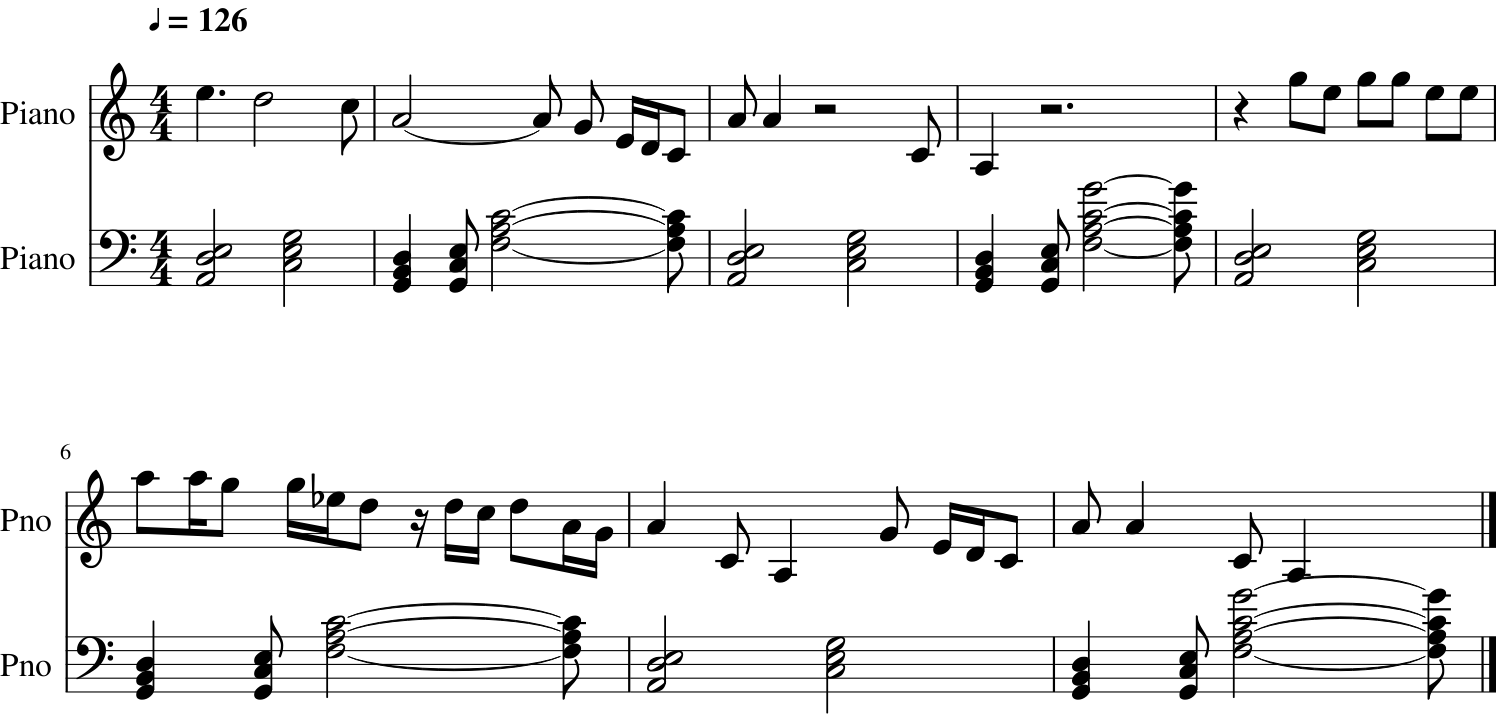

In [24]:
item = MusicItem.from_file(midi_file, data.vocab)
item.show()

Only send a few notes 

Here's what the seed sounds like:

## Predictions

#### 1. Next word prediction

Non midi note detected. Only returning valid portion. Index, seed 34 (234, 2)


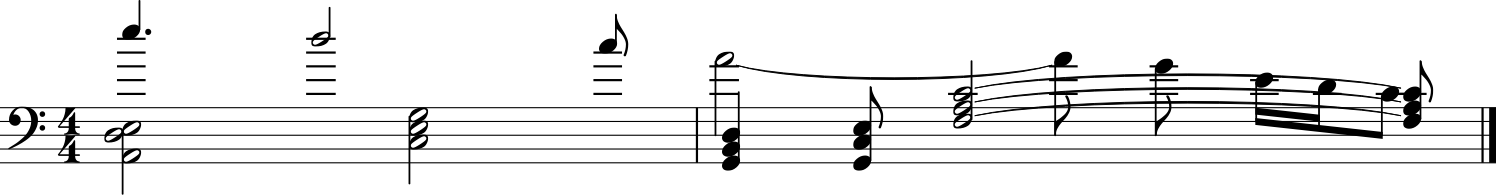

In [25]:
next_word = nw_predict_from_midi(learn, midi_file, seed_len=8); next_word.show()

Non midi note detected. Only returning valid portion. Index, seed 6 (106, 2)


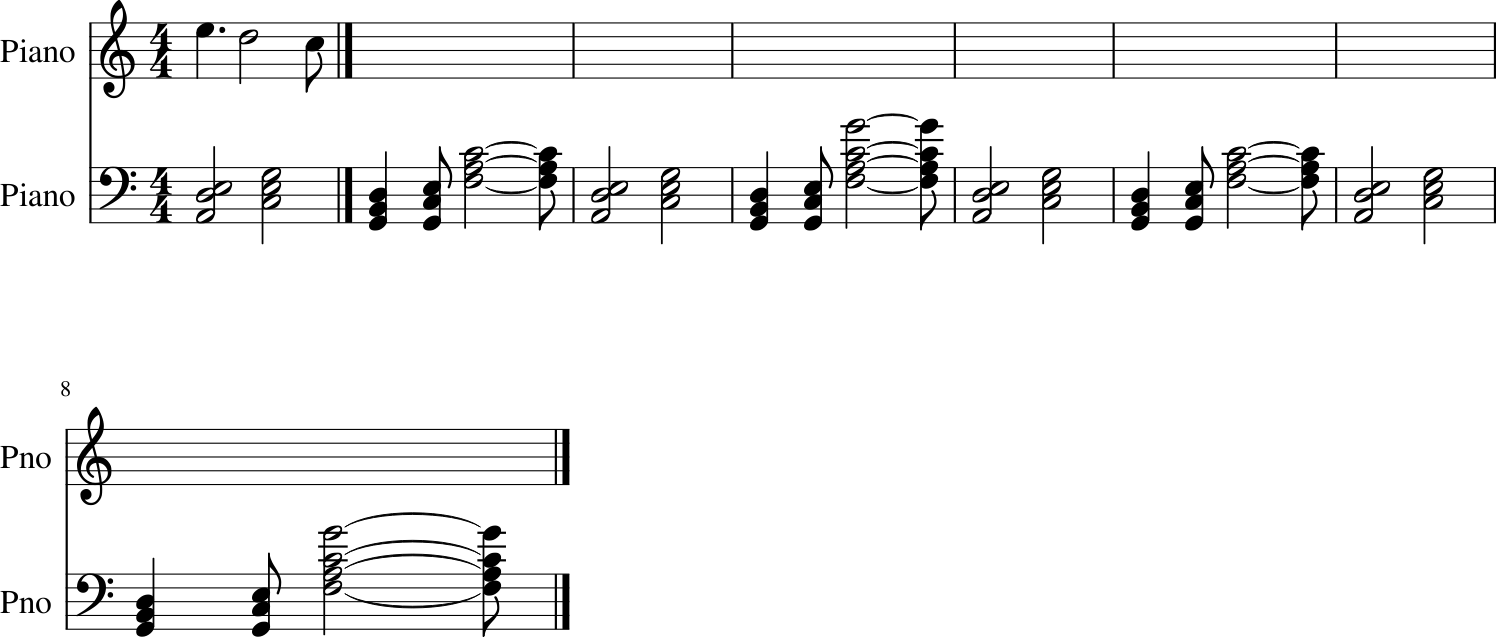

In [26]:
pred_melody = s2s_predict_from_midi(learn, midi_file, seed_len=4, pred_melody=True); pred_melody.show()

In [27]:
pred_notes = mask_predict_from_midi(learn, midi_file, predict_notes=True); pred_notes.show()

IndexError: index 129 is out of bounds for axis 2 with size 128